In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = zipfile.ZipFile('/content/drive/MyDrive/CoronaDataset.zip')
data.extractall()
data.close()

In [ ]:
def plot_history_model(hist):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('Accuracy vs Val_Accuracy')
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.subplot(1,2,2)
  plt.title('Loss vs Val_Loss')
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.show()



In [ ]:
dir_data='/content/Covid19-dataset/train'
dir_l=[]
for i in os.listdir('/content/Covid19-dataset/train'):
  class_dir =dir_l.append(dir_data+'/'+i)
count=0
columns = 5
rows = 3
f=1

imgs_to_plot=[]
for i in dir_l:
  print(i)
  for j in os.listdir(i):
    img_dir=i+'/'+j
    img = plt.imread(img_dir)
    imgs_to_plot.append(img)
    count=count+1
    if count>=5:
      count=0
      break




/content/Covid19-dataset/train/Viral Pneumonia
/content/Covid19-dataset/train/Normal
/content/Covid19-dataset/train/Covid


In [ ]:
len(imgs_to_plot)

15

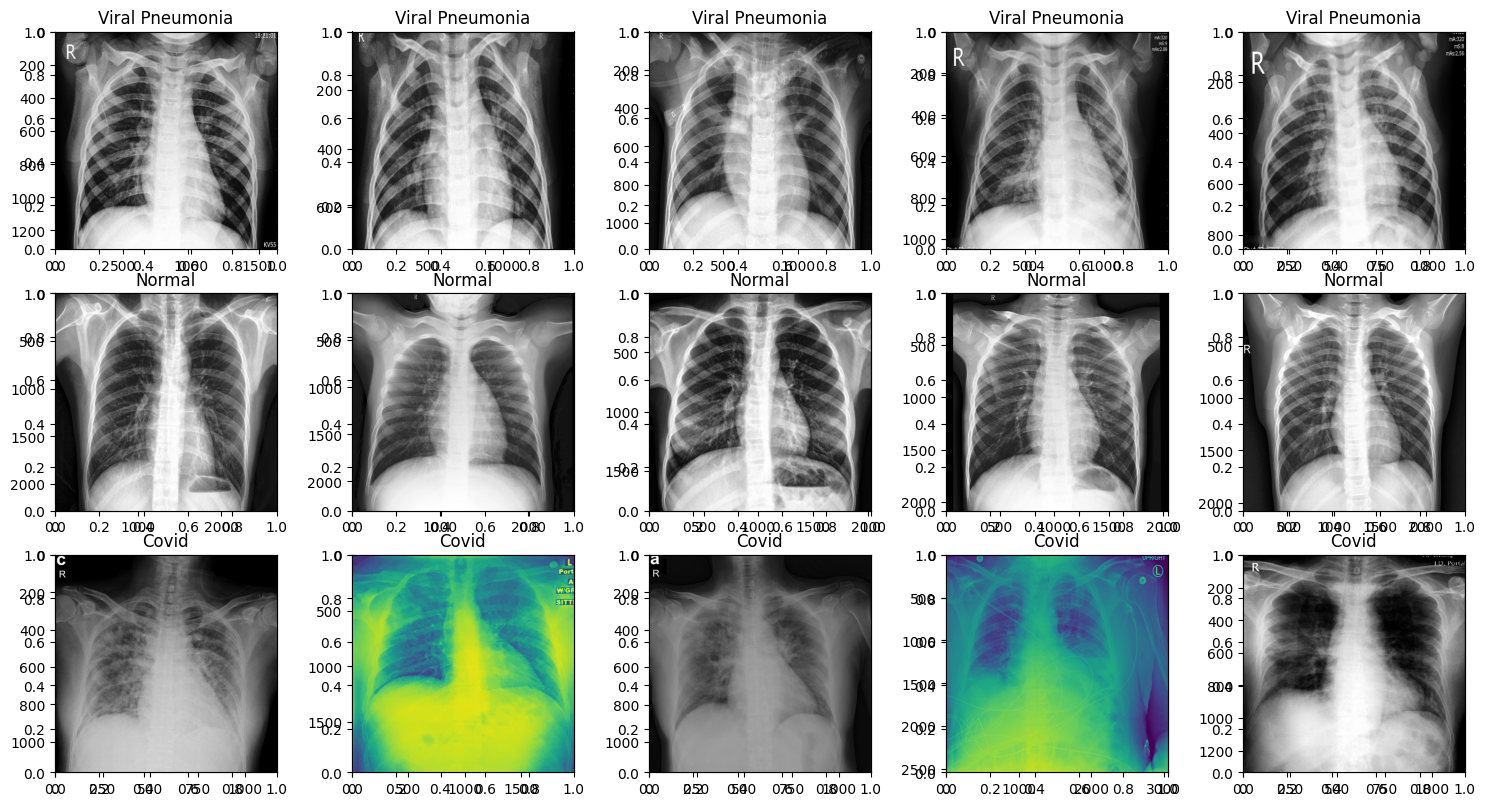

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 8))

columns = 5
rows = 3
titles=['Viral Pneumonia','Normal','Covid']
for i in range(1, columns*rows +1):
    img = imgs_to_plot[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,aspect='auto')

fig.tight_layout()
for i in range(3):
  for ax in axes[i]:
    ax.set_title(titles[i])


plt.show()

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory('/content/Covid19-dataset/train')
data_test = tf.keras.utils.image_dataset_from_directory('/content/Covid19-dataset/test')

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
data_train.class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
def scaling(img,label):
  img=img/255.
  return img,label

In [ ]:
data_train=data_train.map(scaling)
data_test=data_test.map(scaling)

In [ ]:
data_train

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
r=tf.keras.layers.Resizing(256,256)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,3,activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 128)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                   

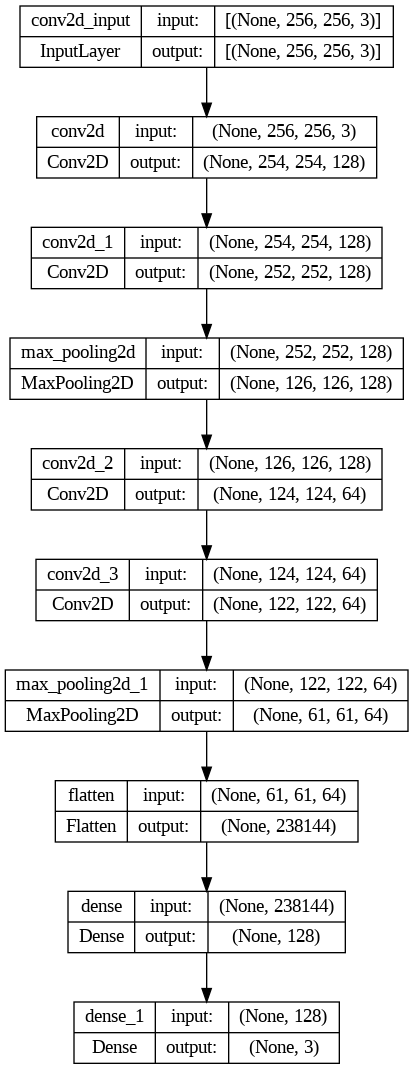

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_check_point=tf.keras.callbacks.ModelCheckpoint('check_point_baseModel/best',monitor='val_loss',save_best_only=True)

In [ ]:
hist=model.fit(data_train,epochs=10,validation_data=data_test,callbacks=model_check_point)

Epoch 1/10
8/8 [==============================] - 46s 3s/step - loss: 4.6196 - accuracy: 0.4024 - val_loss: 1.0326 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 10s 852ms/step - loss: 0.7481 - accuracy: 0.6534 - val_loss: 0.6123 - val_accuracy: 0.6970
Epoch 3/10
8/8 [==============================] - 10s 948ms/step - loss: 0.2992 - accuracy: 0.9044 - val_loss: 0.4683 - val_accuracy: 0.7879
Epoch 4/10
8/8 [==============================] - 7s 494ms/step - loss: 0.1757 - accuracy: 0.9442 - val_loss: 0.7462 - val_accuracy: 0.7424
Epoch 5/10
8/8 [==============================] - 9s 775ms/step - loss: 0.2877 - accuracy: 0.9004 - val_loss: 0.3582 - val_accuracy: 0.8485
Epoch 6/10
8/8 [==============================] - 8s 583ms/step - loss: 0.1587 - accuracy: 0.9402 - val_loss: 0.7233 - val_accuracy: 0.8485
Epoch 7/10
8/8 [==============================] - 8s 581ms/step - loss: 0.0748 - accuracy: 0.9641 - val_loss: 0.5872 - val_accuracy: 0.8939
Epoch 8/10
8/8 [====

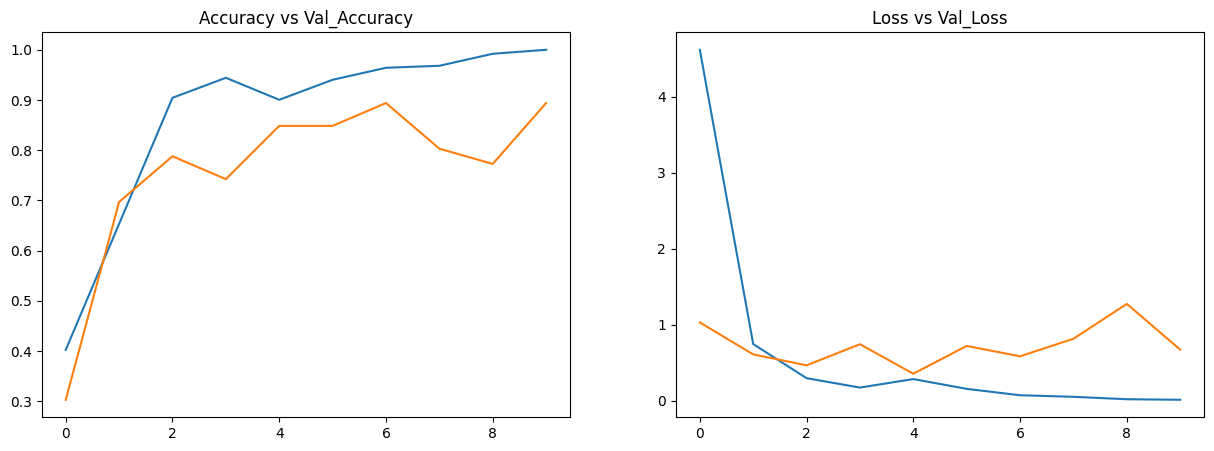

In [ ]:
plot_history_model(hist)

In [ ]:
best_model = tf.keras.models.load_model('/content/check_point_baseModel/best')
eval=best_model.evaluate(data_test)

3/3 [==============================] - 1s 71ms/step - loss: 0.3582 - accuracy: 0.8485


In [ ]:
preds=best_model.predict(data_test)
preds

3/3 [==============================] - 1s 154ms/step


array([[9.84999120e-01, 4.20050434e-04, 1.45809203e-02],
       [5.18522086e-03, 3.91472057e-02, 9.55667555e-01],
       [7.09708314e-03, 8.79832327e-01, 1.13070607e-01],
       [3.64593370e-03, 8.67775083e-01, 1.28579006e-01],
       [9.00088727e-01, 1.66410841e-02, 8.32702368e-02],
       [9.99255598e-01, 2.25038330e-05, 7.21848453e-04],
       [2.11105193e-03, 7.31099725e-01, 2.66789258e-01],
       [5.37871607e-02, 2.11632401e-01, 7.34580398e-01],
       [2.12640758e-03, 9.58095729e-01, 3.97778377e-02],
       [1.55934095e-02, 3.78776528e-02, 9.46528912e-01],
       [1.89292450e-02, 8.81077722e-03, 9.72260058e-01],
       [9.49322879e-01, 3.86601314e-02, 1.20169539e-02],
       [9.95386779e-01, 4.12662933e-03, 4.86611912e-04],
       [2.07090797e-03, 9.80885029e-01, 1.70440543e-02],
       [1.89181343e-02, 9.75892723e-01, 5.18914359e-03],
       [9.99641061e-01, 1.15174014e-04, 2.43809191e-04],
       [7.60092447e-03, 4.54031825e-01, 5.38367271e-01],
       [1.44526351e-03, 8.84440

In [ ]:
max_val =np.argmax(preds,axis=1)
max_val

array([0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
read_im=plt.imread('/content/Covid19-dataset/test/Covid/0108.jpeg')/255.
out=r(read_im)
p=np.argmax(model.predict(np.expand_dims(out,axis=0)),axis=1)

1/1 [==============================] - 1s 603ms/step


In [ ]:
p

array([0])

In [ ]:
# 1. Create base model with tf.keras.applications
transfer_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

transfer_model.trainable = False

inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

x = transfer_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
final_model = tf.keras.Model(inputs,outputs)
final_model.summary()

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 8, 8, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                        

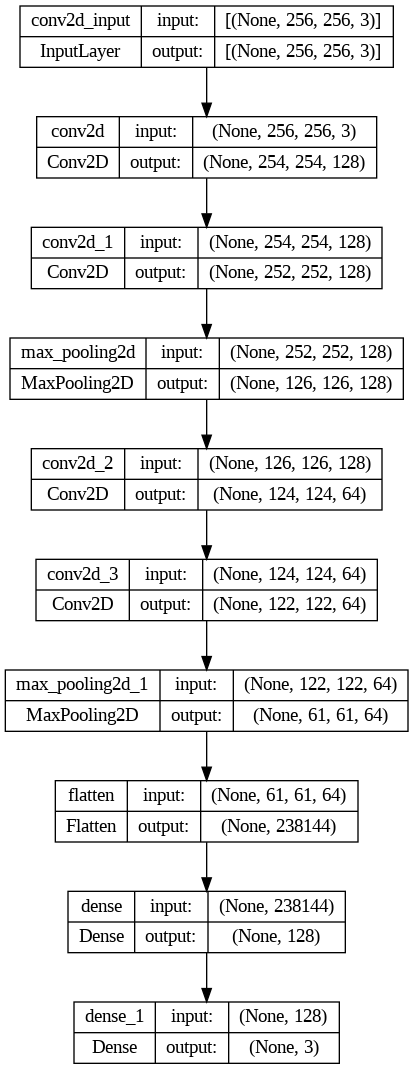

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
final_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_check_point_transfer=tf.keras.callbacks.ModelCheckpoint('check_point_baseModel/trainsfer_model',monitor='val_loss',save_best_only=True)

In [ ]:
history_final_model=final_model.fit(data_train,epochs=10,validation_data=data_test,callbacks=model_check_point_transfer)

Epoch 1/10
8/8 [==============================] - 51s 5s/step - loss: 0.9543 - accuracy: 0.5339 - val_loss: 0.8553 - val_accuracy: 0.6515
Epoch 2/10
8/8 [==============================] - 34s 4s/step - loss: 0.6716 - accuracy: 0.7849 - val_loss: 0.7224 - val_accuracy: 0.6515
Epoch 3/10
8/8 [==============================] - 34s 4s/step - loss: 0.5106 - accuracy: 0.8765 - val_loss: 0.6130 - val_accuracy: 0.7273
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.4407 - accuracy: 0.8924 - val_loss: 0.5547 - val_accuracy: 0.7727
Epoch 5/10
8/8 [==============================] - 34s 4s/step - loss: 0.3533 - accuracy: 0.9323 - val_loss: 0.5119 - val_accuracy: 0.7879
Epoch 6/10
8/8 [==============================] - 35s 5s/step - loss: 0.3238 - accuracy: 0.9044 - val_loss: 0.4741 - val_accuracy: 0.7727
Epoch 7/10
8/8 [==============================] - 35s 4s/step - loss: 0.2959 - accuracy: 0.9243 - val_loss: 0.4152 - val_accuracy: 0.8636
Epoch 8/10
8/8 [==================

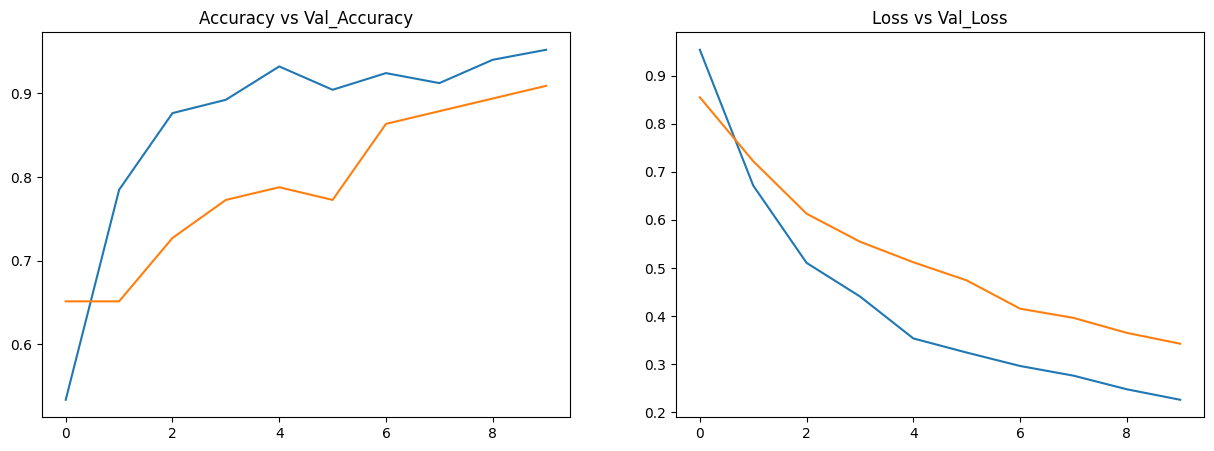

In [ ]:
plot_history_model(history_final_model)

In [ ]:
transfer_best = tf.keras.models.load_model('/content/check_point_baseModel/trainsfer_model')
eval=transfer_best.evaluate(data_test)
eval

3/3 [==============================] - 2s 53ms/step - loss: 0.3423 - accuracy: 0.9091


[0.3422815501689911, 0.9090909361839294]

In [ ]:
transfer_best.save('detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
preds_transfer=transfer_best.predict(data_test)
preds_transfer = np.argmax(preds_transfer,axis=1)
preds_transfer

3/3 [==============================] - 1s 72ms/step


array([2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0])

In [ ]:
read_im=plt.imread('/content/Covid19-dataset/test/Viral Pneumonia/0120.jpeg')
out=r(read_im)
p=np.argmax(model.predict(np.expand_dims(out,axis=0)),axis=1)
p

1/1 [==============================] - 0s 18ms/step


array([2])

In [ ]:
def predict_transfer_detect(img,classes):
  r=tf.keras.layers.Resizing(256,256)
  read_im=plt.imread(img)
  out=r(read_im)
  p=np.argmax(model.predict(np.expand_dims(out,axis=0)),axis=1)
  val=classes[p]
  return val


In [ ]:
os.listdir('/content/e')

[]